In [ ]:
Travel Insurance

In [ ]:
Contents: 

Business Problem Understanding
Data Understanding
Data Preprocessing
Modeling
Conclusion

In [ ]:
Business Problem Understanding

In [ ]:
context

Asuransi Perjalanan (Travel Insurance) adalah salah satu dari sekian banyak asuransi yang menyediakan perlindungan selama 
anggota asuransi yang memiliki asiransi perjalanan ini sedang berpergian ke dalam kota maupun luar kota. 
Bahkan sekarang ini ada beberapa Negara yang mengharuskan traveller untuk memiliki asuransi perjalanan (travel Insurance) ini, 
sebagai contoh adalah Eropa dan Amerika. Jumlah Harga premi yang diberikan semua berdasarkan apa saja yang ingin 
dapat di cover, berapa lama dari trip nya, dan tujuan dari tripnya. 


Goals 

sebuah perusahaan yang bergerak di bidang travel insurance ingin mengetahui pemegang polis yang seperti apa yang akan
mengajukan claim untuk mendapatkan coverage yang dimiliki pemegang polisnya berdarahkan data history perjalanan, jenis
produk asuransi dan yang lainnya.

In [ ]:
Analytic Approach

Jadi dari data histori yang kita miliki, Pertama-tama kita akan melakukan analisi data dan cleaning data agar data yang di
analisis tidak banyak error yang akan terjadi.

Setelah itu, kita akan melakukan klasifikasi pemegang polis yang akan mengajukan adalah yang seperti apa
agar dapat memahami jenis produk yang seperti apa yang risknya lebih tinggi sehingga memungkinkan pemegang
asuransi untuk melakukan claim.


In [ ]:
Metric Evaluation

Karena disini goal kita adalah untuk mengetahui pemegang polis dengan jenis asuransi yang seperti apa yang akan melakukan
claim, maka untuk metric evaluation ini saya akan menggunakan Classification Metrics. Maka dari itu saya akan melakukan 
percobaan dengan melakukan evaluasi menggunakan  Accuracy,Precision, Recall, and F1-score,Confusion Matrix,
dan ROC-AUC (Receiver Operating Characteristic - Area Under Curve). 

Evaluasi evaluasi ini berguna untuk melakukan comparing jenis product untuk mengasilkan data yang balance dan hasil detect
data claim atau tidak claim yang baik.

In [ ]:
Data Understanding

-	Agency: Nama Agensi.
-	Agency Type: Tipe travel insurance.
-	Distribution Channel: Channel of travel insurance agencies.
-	Product Name: Nama Product asuransinya.
-	Gender: Jenis Kelamin.
-	Duration: berapa lama trip nya.
-	Destination: tujuan tripnya.
-	Net Sales: harga total premi yang di jualkan.
-	Commission (in value): komisi yang diterima.
-	Age: umur yang tertanggung.
-	Claim: Claim status.

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [33]:
data_claim = pd.read_csv('data_travel_insurance.csv')
data_claim.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [34]:
# Data Types dari setiap atribute

print("Data types:\n", data_claim.dtypes)

Data types:
 Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Gender                   object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
Claim                    object
dtype: object


In [35]:
# Data Cleaning

# Melihat data apa saya yang banyak kosong

data_claim.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

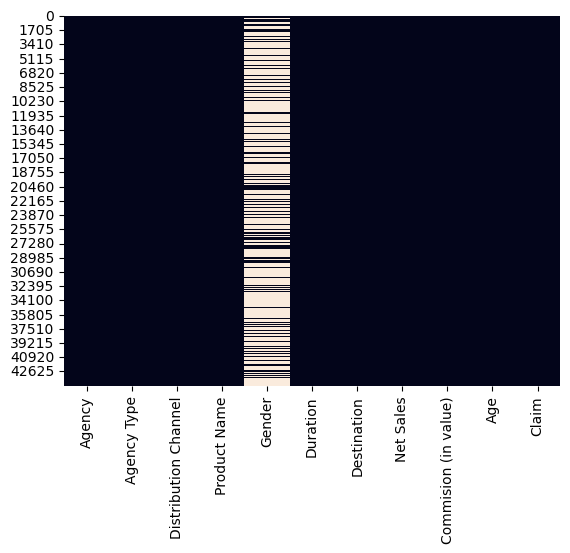

In [36]:
sns.heatmap(data_claim.isnull(), cbar=False)
plt.show()

In [37]:
# dapat dilihat bahwa data Gender memiliki banyak data yang kosong maka dari itu 
# saya akan mencari data gender yang paling banyak untuk mengisi data kosong karena 
# ditakutkan gender dibutuhkan untuk evaluasi

Gender_paling_banyak = data_claim['Gender'].mode()[0]
data_claim['Gender'] = data_claim['Gender'].fillna(Gender_paling_banyak)

In [38]:
# Mengecek kembali data apa saya yang banyak kosong

data_claim.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [39]:
# Melakukan pengecekkan data kembali

data_claim.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,M,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [40]:
# Details data yang berhubungan dengan pemegang polisnya (Age dan gender)

data_claim['Age'].describe()

count    44328.000000
mean        39.925600
std         13.954926
min          0.000000
25%         35.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

In [41]:
data_claim['Gender'].value_counts()

Gender
M    38151
F     6177
Name: count, dtype: int64

In [42]:
# Detail Perjalanannya (Destination,Duration)

data_claim['Destination'].value_counts().head(10)

Destination
SINGAPORE        9267
MALAYSIA         4139
THAILAND         4122
CHINA            3396
AUSTRALIA        2578
INDONESIA        2384
PHILIPPINES      1758
UNITED STATES    1743
HONG KONG        1743
INDIA            1572
Name: count, dtype: int64

In [43]:
data_claim['Duration'].describe()

count    44328.000000
mean        49.424292
std        109.153961
min         -1.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

In [44]:
# Detail produk asuransinya

data_claim['Net Sales'].describe()

count    44328.000000
mean        40.550948
std         48.661970
min       -357.500000
25%         18.000000
50%         26.500000
75%         48.000000
max        810.000000
Name: Net Sales, dtype: float64

In [45]:
data_claim['Commision (in value)'].describe()

count    44328.000000
mean         9.707692
std         19.625637
min          0.000000
25%          0.000000
50%          0.000000
75%         11.550000
max        283.500000
Name: Commision (in value), dtype: float64

In [46]:
# yang terakhir hitung jumlah counts dari claim satatusnya

data_claim['Agency Type'].value_counts()


Agency Type
Travel Agency    32113
Airlines         12215
Name: count, dtype: int64

In [47]:
data_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                44328 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


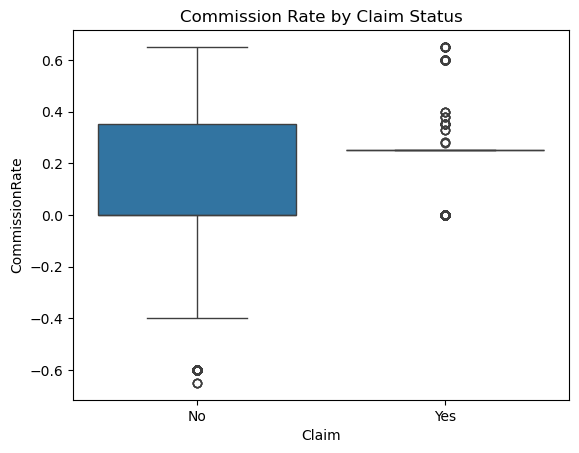

In [48]:
# Data Visualisasi

data_claim['CommissionRate'] = data_claim['Commision (in value)'] / data_claim['Net Sales'].replace(0, np.nan)
sns.boxplot(x='Claim', y='CommissionRate', data=data_claim)
plt.title('Commission Rate by Claim Status')
plt.show()



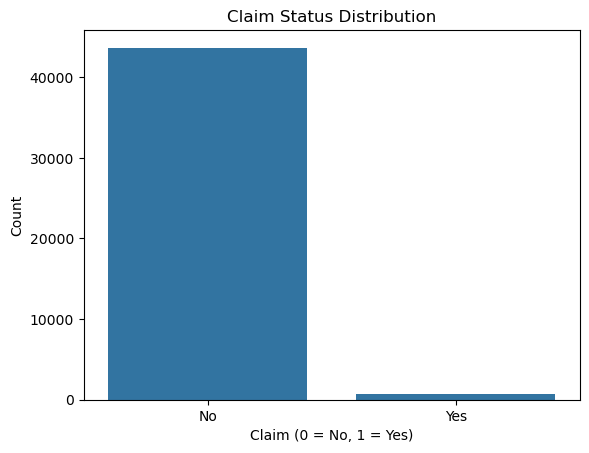

Claim distribution (%):
 Claim
No     98.472749
Yes     1.527251
Name: proportion, dtype: float64


In [49]:
# Analysis Data 

# Check Imbalance

sns.countplot(x='Claim', data=data_claim)
plt.title('Claim Status Distribution')
plt.xlabel('Claim (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

claimcountspercen = data_claim['Claim'].value_counts(normalize=True) * 100
print("Claim distribution (%):\n", claimcountspercen)

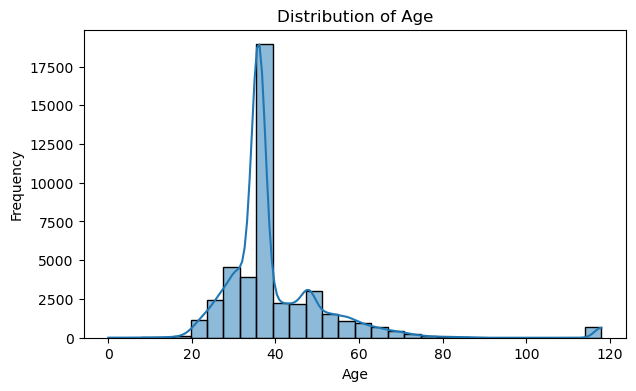

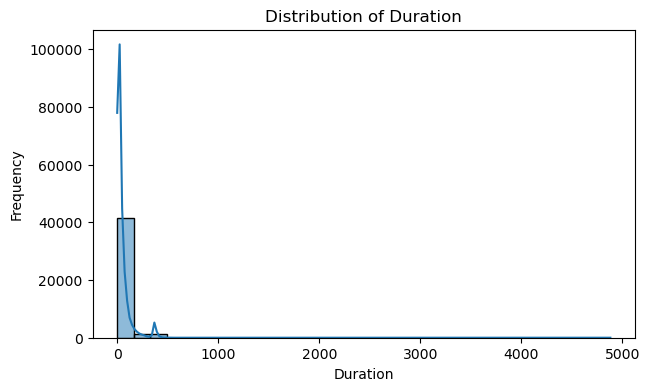

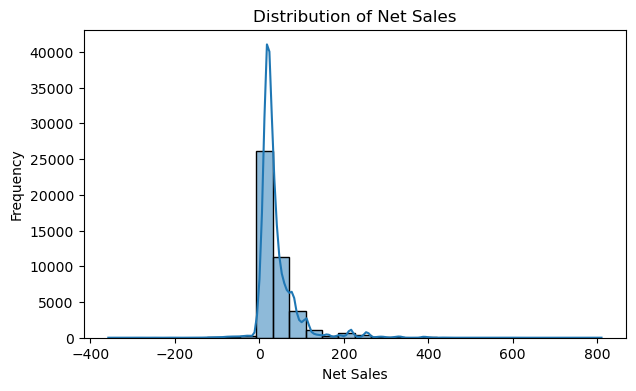

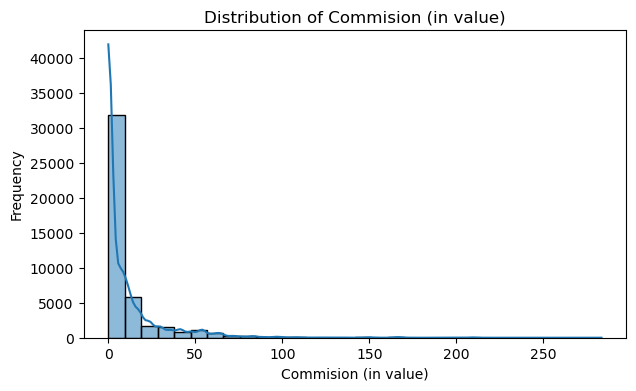

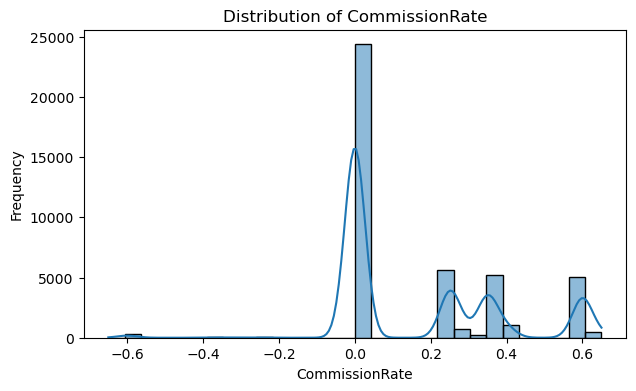

In [50]:
# Distribusi Data Numeric

Coloum_Scaler = ['Age', 'Duration', 'Net Sales', 'Commision (in value)', 'CommissionRate']
for coloum in Coloum_Scaler:
    plt.figure(figsize=(7, 4))
    sns.histplot(data_claim[coloum], kde=True, bins=30)
    plt.title(f'Distribution of {coloum}')
    plt.xlabel(coloum)
    plt.ylabel('Frequency')
    plt.show()

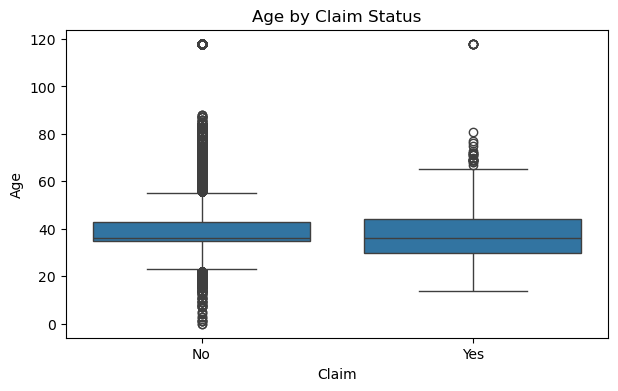

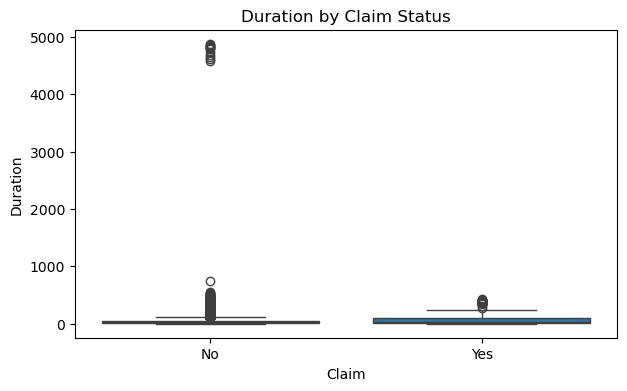

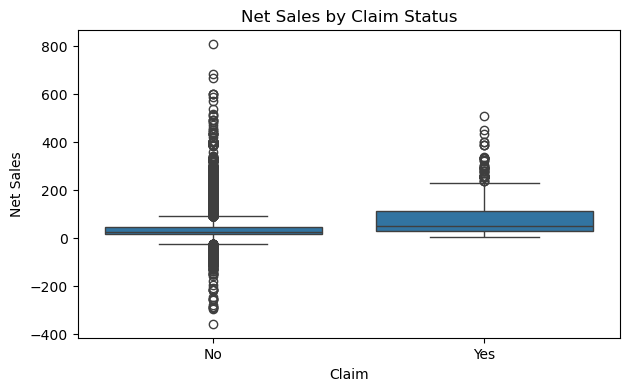

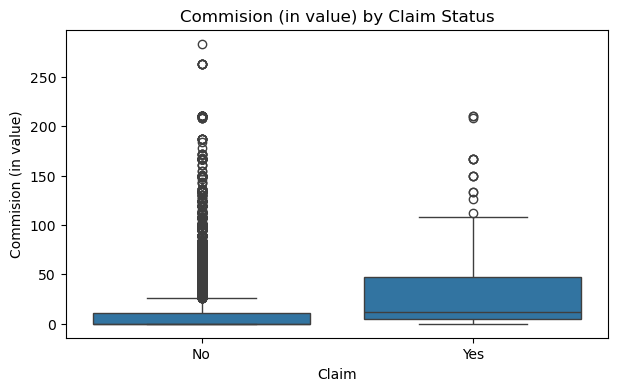

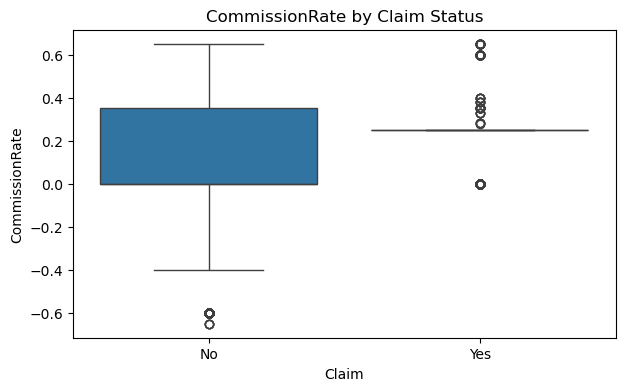

In [51]:
# visualisasi data numeric vs claim

for coloum in Coloum_Scaler:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Claim', y=coloum, data=data_claim)
    plt.title(f'{coloum} by Claim Status')
    plt.show()

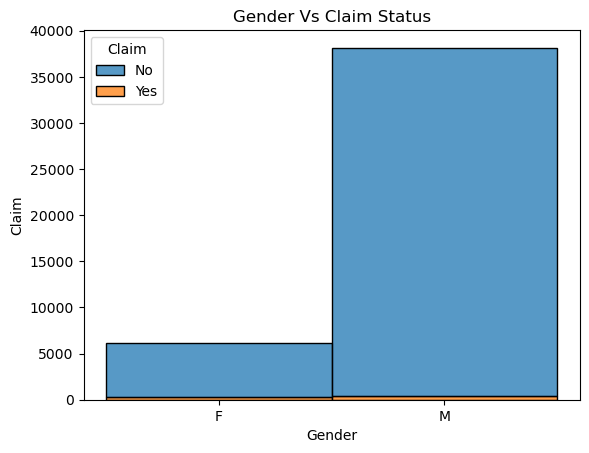

In [52]:
sns.histplot(data=data_claim, x='Gender', hue='Claim', multiple='stack')
plt.title('Gender Vs Claim Status')
plt.xlabel('Gender')
plt.ylabel('Claim')
plt.show()

In [53]:
data_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                44328 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
 11  CommissionRate        43037 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 4.1+ MB


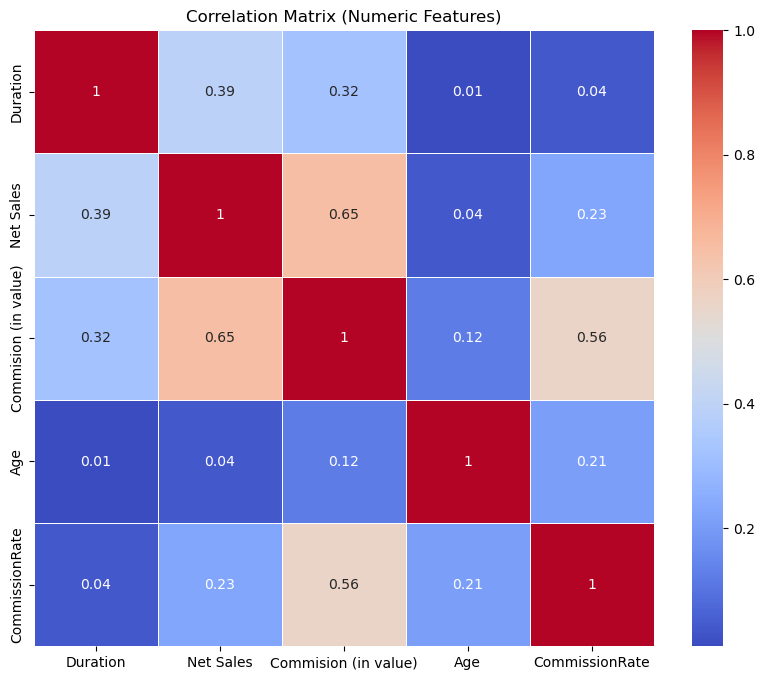

In [54]:
# Data Correlation (Correlation Matrix)

Data_numeric = data_claim.select_dtypes(include=['number'])
Korelasi = Data_numeric.corr()

corr_rounded = Korelasi.round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_rounded, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


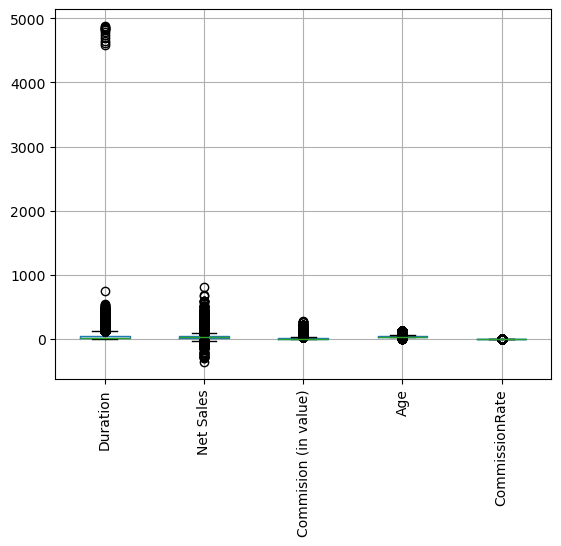

In [55]:
# Outliers Detection (Identify Outliers (Boxplots))
data_claim.boxplot(rot=90);


In [56]:
#Coloum_Scaler = ['Age', 'Duration', 'Net Sales', 'Commission (in value)', 'CommissionRate']

def detect_outliers(data_claim, column):
    Q1 = data_claim[column].quantile(0.25)
    Q3 = data_claim[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR
    outliers = data_claim[(data_claim[column] < lowerbound) | (data_claim[column] > upperbound)]
    return outliers , lowerbound , upperbound

outliersduration , LowerBoundduration , UpperBoundduration = detect_outliers(data_claim, 'Duration')
outliersNetSales , LowerBoundNetSales , UpperBoundNetSales = detect_outliers(data_claim, 'Net Sales')
outliersComission , LowerBoundComission , UpperBoundComission= detect_outliers(data_claim, 'Commision (in value)')
outliersAge , LowerBoundAge , UpperBoundAge= detect_outliers(data_claim, 'Age')
outliersRate, LowerBoundRate , UpperBoundRate = detect_outliers(data_claim, 'CommissionRate')

print(f"Outliers in 'Duration': {len(outliersduration),LowerBoundduration,UpperBoundduration}")
print(f"Outliers in 'Net Sales': {len(outliersNetSales),LowerBoundNetSales,UpperBoundNetSales}")
print(f"Outliers in 'Commision (in value)': {len(outliersComission),LowerBoundComission,UpperBoundComission}")
print(f"Outliers in 'Age': {len(outliersAge),LowerBoundAge,UpperBoundAge}")
print(f"Outliers in 'Rate': {len(outliersRate),LowerBoundRate,UpperBoundRate}")

Outliers in 'Duration': (3869, -57.0, 119.0)
Outliers in 'Net Sales': (3879, -27.0, 93.0)
Outliers in 'Commision (in value)': (4909, -17.325000000000003, 28.875000000000004)
Outliers in 'Age': (5196, 23.0, 55.0)
Outliers in 'Rate': (273, -0.5249999999999999, 0.8749999999999999)


In [57]:
# Feature Engineering

# Risk SCORE -> untuk menemtukan jumlah resiko yang akan terjadi

def riskscorecalculate(row):
    score = 0
    if row['Duration'] > 20:
        score += 1
    if row['CommissionRate'] > 0.2:
        score += 1
    if row['Age'] < 25 or row['Age'] > 60:
        score += 1
    return score

data_claim['RiskScore'] = data_claim.apply(riskscorecalculate, axis=1)


In [58]:
# count agency-> klasifikasi berdasarkan nama agencynya 

agencyfreqcount = data_claim['Agency'].value_counts()
data_claim['FrequentCountAgency'] = data_claim['Agency'].apply(lambda x: 1 if agencyfreqcount[x] > 50 else 0)


In [59]:
# menghapus colom yang tidak terpakai 

#1 
data_claim.drop(['Agency'], axis=1, inplace=True)  

In [60]:
#2 -> untuk mengecek kira2 ada colom property lain tidak diperlukan

corr_matrix = data_claim.select_dtypes(include=np.number).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

dropfeatures = [coloum for coloum in upper.columns if any(upper[coloum] > 0.9)]

# Drop them
data_claim.drop(columns=dropfeatures, inplace=True)

print("Dropped due to high correlation:", dropfeatures)

Dropped due to high correlation: []


In [61]:
# menyatukan feactures yang bersifat kategori

category = ['Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']

data_claim = pd.get_dummies(data_claim, columns=category, drop_first=True)

In [62]:
# Menyatukan features numeric

Numeric = ['Age', 'Duration', 'Net Sales', 'Commision (in value)', 'CommissionRate', 'RiskScore']

scaler = StandardScaler()
data_claim[Numeric] = scaler.fit_transform(data_claim[Numeric])

In [63]:
# Prepate data test

X = data_claim.drop(columns=['Claim'])
y = data_claim['Claim']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [64]:
print(X_train.isnull().sum().sort_values(ascending=False).head(10))

CommissionRate                      1064
Duration                               0
Destination_NAMIBIA                    0
Destination_MALI                       0
Destination_MALTA                      0
Destination_MAURITIUS                  0
Destination_MEXICO                     0
Destination_MOLDOVA, REPUBLIC OF       0
Destination_MONGOLIA                   0
Destination_MOROCCO                    0
dtype: int64


In [65]:
DataInsert = SimpleImputer(strategy='median')
X_train = pd.DataFrame(DataInsert.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(DataInsert.transform(X_test), columns=X_test.columns)

In [66]:
# evaluasi accurancy, Precision, Recall, F1-score

datadummy = DummyClassifier(strategy='most_frequent')
datadummy.fit(X_train, y_train)
y_dummy_pred = datadummy.predict(X_test)

print("\n--- Baseline Dummy Model (Most Frequent) ---")
print("Accuracy:", accuracy_score(y_test, y_dummy_pred))
print(classification_report(y_test, y_dummy_pred))


# Accuracy -> HASIL MASIH KURANG AKURAT KARENA MODEL HANYA BISA CEK DATA2 MAYORITAS AJA
# f1-score -> HASIL UNTUK CLAIM YANG YES SANGAT RENDAH KARENA DATA BANYAKAN YANG NO


--- Baseline Dummy Model (Most Frequent) ---
Accuracy: 0.9847732912249041
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      8731
         Yes       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866



In [56]:
# Evaluasi menggunakan ROC AUC

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("🔹 Logistic Regression\n", classification_report(y_test, y_pred_lr))


🔹 Logistic Regression
               precision    recall  f1-score   support

          No       0.99      0.81      0.89      8731
         Yes       0.05      0.73      0.10       135

    accuracy                           0.80      8866
   macro avg       0.52      0.77      0.50      8866
weighted avg       0.98      0.80      0.88      8866



In [54]:
random = RandomForestClassifier(n_jobs=1)
random.fit(X_train, y_train)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

y_pred_rf = random.predict(X_test)
print("🔹 Random Forest\n", classification_report(y_test, y_pred_rf))

# Random -> HASIL MASIH LEBIH OKE DARI YANG SEBELUMNYA TP DATA TETAP MASIH BELUM BISA DIPERCAYA

🔹 Random Forest
               precision    recall  f1-score   support

          No       0.98      1.00      0.99      8731
         Yes       0.11      0.01      0.03       135

    accuracy                           0.98      8866
   macro avg       0.55      0.51      0.51      8866
weighted avg       0.97      0.98      0.98      8866



In [55]:
y_test_prob = random.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_test_prob)
print("AUC-ROC Score:", auc)

# AUC-ROC -> SUDAH BISA DIPERCAYA SECARA UMUM KARENA NILAI DIATAS 0,7 TETAPI TTU MSH BELOM EFEKTIF UNTUK CLAIM YANG YES
# RECOMENDASI -> MENAMBAHKAN FEATURE ENGINEERINGNYA DAN COBA MODEL LAIN SEPERTI (XGBoost, LightGBM)

AUC-ROC Score: 0.7251534549094966
